```{contents}
```
## Visual Editor

A **Visual Editor** in the LangGraph ecosystem refers to the set of tools and interfaces that allow developers to **inspect, understand, debug, and document LangGraph workflows visually** instead of only through code.
Although LangGraph itself is code-first, it provides **first-class visualization hooks** that integrate with notebook environments, developer tooling, and observability platforms.

---

### **1. Why a Visual Editor Is Necessary**

Large LLM systems are:

* Stateful
* Cyclic
* Multi-agent
* Dynamic
* Non-deterministic

Text-only code quickly becomes insufficient for understanding such systems.
A visual editor enables:

| Capability               | Benefit                                |
| ------------------------ | -------------------------------------- |
| Structural understanding | See the whole workflow                 |
| Debugging                | Identify broken paths & infinite loops |
| Optimization             | Remove unnecessary nodes               |
| Documentation            | Share system architecture              |
| Governance               | Audit execution behavior               |

---

### **2. Visual Editor Architecture**

LangGraph’s visualization pipeline is composed of three layers:

```
Graph Definition  →  Graph IR  →  Visualization Backends
```

| Layer                  | Responsibility                |
| ---------------------- | ----------------------------- |
| Graph Definition       | Python code (`StateGraph`)    |
| Graph IR               | Internal graph representation |
| Visualization Backends | PNG, Mermaid, LangSmith UI    |

---

### **3. Built-In Visualization APIs**

### **3.1 Static Graph Visualization (PNG)**

```python
from IPython.display import Image, display
display(Image(graph.get_graph().draw_png()))
```

**Characteristics**

* High-resolution static diagram
* Uses Graphviz
* Best for documentation and architecture reviews

---

### **3.2 Interactive Graph Visualization (Mermaid)**

```python
display(graph.get_graph().draw_mermaid())
```

**Characteristics**

* Interactive in Jupyter notebooks
* Zoomable, collapsible nodes
* No native dependencies

---

### **3.3 Execution Visualization (LangSmith)**

```python
graph.invoke(input, config={"callbacks": [LangChainTracer()]})
```

In LangSmith UI:

* Execution timeline
* Node-level state changes
* Token usage
* Tool calls
* Errors & retries

This functions as a **runtime visual editor**.

---

### **4. Visual Representation Model**

A rendered graph visually expresses:

| Element          | Meaning              |
| ---------------- | -------------------- |
| Node             | Computation unit     |
| Edge             | Execution transition |
| Conditional edge | Runtime decision     |
| Loop             | Cyclic feedback      |
| Start node       | Entry point          |
| End node         | Termination          |
| Subgraph         | Nested workflow      |
| Parallel paths   | Concurrent execution |

---

### **5. Example: Visualizing a Cyclic Agent**

```python
builder.add_edge("reason", "act")
builder.add_edge("act", "observe")
builder.add_conditional_edges("observe", route, {
    "continue": "reason",
    "stop": END
})
```

Visualization reveals:

```
Reason → Act → Observe
   ↑             ↓
   └──── Loop ───┘
```

This makes **agent behavior immediately obvious**.

---

### **6. Visual Debugging Workflow**

1. Build graph
2. Compile graph
3. Render structure
4. Execute with tracing
5. Inspect runtime visualization
6. Modify graph
7. Re-render

This creates a **closed-loop development cycle**.

---

### **7. Production Use of Visual Editor**

| Stage         | Use                     |
| ------------- | ----------------------- |
| Design        | Architecture validation |
| Testing       | Logic verification      |
| Review        | Security & compliance   |
| Monitoring    | Live failure analysis   |
| Optimization  | Bottleneck detection    |
| Documentation | System diagrams         |

---

### **8. Enterprise Extensions**

| Tool          | Purpose                      |
| ------------- | ---------------------------- |
| LangSmith     | Full execution visual editor |
| Mermaid       | Interactive architecture UI  |
| Graphviz      | Formal documentation         |
| OpenTelemetry | Distributed traces           |

---

### **9. Conceptual Summary**

The Visual Editor is not a single UI tool — it is an **ecosystem of visualization capabilities** that transform LangGraph from a code-only workflow engine into a **fully observable, inspectable, and governable intelligent system**.


### Demonstration

Final State: {'count': 5, 'done': True}


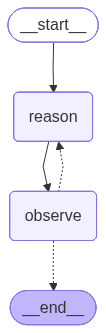

In [4]:
# === LangGraph Visual Editor: Full Demonstration in One Cell ===

from typing import TypedDict
from langgraph.graph import StateGraph, END
from IPython.display import Image, display

# -------------------------------
# 1. Define State
# -------------------------------

class State(TypedDict):
    count: int
    done: bool

# -------------------------------
# 2. Define Nodes
# -------------------------------

def reason(state):
    return {"count": state["count"] + 1}

def observe(state):
    return {"done": state["count"] >= 5}

# -------------------------------
# 3. Routing Logic (Cycle Control)
# -------------------------------

def route(state):
    if state["done"]:
        return END
    return "reason"

# -------------------------------
# 4. Build Cyclic Graph
# -------------------------------

builder = StateGraph(State)

builder.add_node("reason", reason)
builder.add_node("observe", observe)

builder.set_entry_point("reason")
builder.add_edge("reason", "observe")

builder.add_conditional_edges("observe", route, {
    "reason": "reason",
    END: END
})

graph = builder.compile()

# -------------------------------
# 5. Visual Editor — Render Graph
# -------------------------------



# -------------------------------
# 6. Execute Graph
# -------------------------------

result = graph.invoke({"count": 0, "done": False})
print("Final State:", result)

Image(graph.get_graph().draw_mermaid_png())